### Introdução e objetivo
A Relatividade Geral desafiou os conceitos clássicos estabelecidos pela mecânica newtoniana, proporcionando uma nova visão sobre a natureza do espaço, do tempo e das interações gravitacionais. Assim, o objetivo dessa atividade é estudar o movimento orbital de partículas em torno de uma massa central, utilizando um método numérico computacional de resolução de equações diferenciais ordinárias para calcular e esboçar as trajetórias em ambos os contextos, newtoniano e relativístico. Além disso, busca-se aprender as técnicas de cálculo numérico e programação e aprofundar o conhecimento da cinemática relativística. A fim de atingir esse objetivo, foram estudados conceitos fundamentais, como a métrica de Schwarzschild e a curvatura do espaço-tempo, visando a construção de um modelo computacional que permita a representação gráfica das trajetórias orbitais. 

### Metodologia

Neste projeto, estamos lidando com equações diferencias da forma $ y'(x)=G(x,y)$. O método de Runge-Kutta de ordem quatro se baseia na discretização do problema. Assim, dividimos a faixa de valores de $x$, criando vetores $x_{n}$ e $y_{n}$ para representar as coordenadas. A partir dessa discretização, encontramos a relação de recorrência para calcular $y_{n+1}$ com base no conhecimento de $y_{n}$.  Essa relação de recorrência envolve o cálculo de quantidades auxiliares $d_{0}, d_{1}, d_{2}$ e $d_{3}$ que são obtidas considerando o passo de integração $h$, que representa a distância entre dois pontos consecutivos de $x_{n}$. 
     
Para aprimorar a eficiência da convergência, utilizamos aproximações pelo método de Runge-Kutta de ordem quatro, ou seja, se reduzirmos o passo $h$ pela metade $\left(\frac{h}{2}\right)$, isto é, reduzir o espaço entre os $x_{n}$, o erro de cálculo é reduzido por um fator de $\left(\frac{1}{2}\right)^4 =\frac{1}{16}$. Assim, esse método nos permite ter uma melhor precisão à medida que reduzimos o passo. 
    
O método possui as seguintes etapas de cálculo:
\begin{align}
          d_{0} = G(x_{n},y_{n})  ,\\
          d_{1} = G(x_{n} +\frac{h}{2}, y_{n} + \frac{h}{2}\cdot d_{0}) ,\\
          d_{2} = G(x_{n} + \frac{h}{2}, y_{n} + \frac{h}{2}\cdot d_{1}) ,\\
          d_{3} = G(x_{n} + h, y_{n} + h\cdot d_{2}) ,\\
          y_{n+1} = y_{n} + 6h(d_{0} +2d_{1} +2d_{2} +d_{3}) .
\end{align}
Deste modo, aplicamos esse método à linguagem de programação Python, a fim de obter como \textit{output} os resultados numéricos dos raios $r_{n}$, ângulos $\theta_{n}$ e de velocidades $v_{n}$. Em nossas simulações, fixamos $m = 1$ e variamos os valores dos parâmetros $r_{0}$ e $l$, que representam a distância inicial do objeto para o centro da força gravitacional e o momento angular orbital, respectivamente, a fim de investigar órbitas de diferentes tamanhos e excentricidades.

No método computacional, realizamos o cálculo da precessão de órbitas iterando sobre o vetor de raios $r_{n}$ até detectar uma inversão de sinal em $\Delta r = r_{n+1} - r_{n}$, que sinaliza a passagem pelo periélio ou afélio, ou seja, pontos de máximo ou mínimo da trajetória. A cada inversão de sinal, o algoritmo calcula tanto o ângulo médio $\theta_{m} = \cfrac{\theta_{n+1} + \theta_{n}}{2}$ quanto o raio médio $r_{m} = \cfrac{r_{n+1} + r_{n}}{2}$ correspondente ao periélio ou afélio. Entretanto, devido às limitações computacionais, optamos por utilizar apenas os afélios, já que no periélio o objeto se move mais rapidamente, o que prejudica a precisão do cálculo do ângulo. 

 A precessão do afélio para cada órbita é então obtida por meio da seguinte equação: $$ \Delta\theta_{prec} = (\theta_{m+2} - \theta_{m}) - 2\pi,$$ na qual o resultado para as equações das trajetórias de Newton deve ser zero, enquanto para as equações das geodésicas o esperado é maior que zero. Assim, calculamos a precessão do periélio para cada órbita, a partir das condições iniciais escolhidas.

In [16]:
#função velocidade 
def fr(r, v, th):
    return v

#função theta
def fth(r, v, th, L):
    return L / (r**2)

#funções da aceleração para mov clássico
def fv(r, v, th, L):
    M = 1  # GM
    F = -(M / (r**2))
    return (L**2 / r**3) + F

#funções da aceleração para mov relativístico
def fv2(r, v, th, L):
    M = 1  # GM
    F = -(M / (r**2))
    return (L**2 / r**3) + F - ((3 * M * L**2) / r**4)

In [17]:
#método de Runge–Kutta de 4ª ordem para resolver o sistema em coordenadas polares
import numpy as np

def newton(N, Tmax, L, r0, v0, th0, fr, fv, fth):
    h = Tmax / N
    t = np.linspace(0, Tmax, N+1)

    # condições iniciais
    r = np.zeros(N+1)
    v = np.zeros(N+1)
    th = np.zeros(N+1)

    r[0] = r0
    v[0] = v0
    th[0] = th0

    h2 = h / 2
    p1 = h / 6
    p2 = 2 * p1

    for i in range(N):
        dr = fr(r[i], v[i], th[i])
        dv = fv(r[i], v[i], th[i], L)
        dth = fth(r[i], v[i], th[i], L)

        d1r = fr(r[i] + h2*dr, v[i] + h2*dv, th[i] + h2*dth)
        d1v = fv(r[i] + h2*dr, v[i] + h2*dv, th[i] + h2*dth, L)
        d1th = fth(r[i] + h2*dr, v[i] + h2*dv, th[i] + h2*dth, L)

        d2r = fr(r[i] + h2*d1r, v[i] + h2*d1v, th[i] + h2*d1th)
        d2v = fv(r[i] + h2*d1r, v[i] + h2*d1v, th[i] + h2*d1th, L)
        d2th = fth(r[i] + h2*d1r, v[i] + h2*d1v, th[i] + h2*d1th, L)

        d3r = fr(r[i] + h*d2r, v[i] + h*d2v, th[i] + h*d2th)
        d3v = fv(r[i] + h*d2r, v[i] + h*d2v, th[i] + h*d2th, L)
        d3th = fth(r[i] + h*d2r, v[i] + h*d2v, th[i] + h*d2th, L)

        r[i+1] = r[i] + (p1*dr + p2*(d1r + d2r) + p1*d3r)
        v[i+1] = v[i] + (p1*dv + p2*(d1v + d2v) + p1*d3v)
        th[i+1] = th[i] + (p1*dth + p2*(d1th + d2th) + p1*d3th)

    Y = np.vstack((r, v, th))
    return t, Y

In [ ]:
# mesma coisa mas utilizando o mov relativistico
def einstein(N, Tmax, L, r0, v0, th0, fr, fv2, fth):
    h = Tmax / N
    t = np.linspace(0, Tmax, N+1)

    # condições iniciais
    r = np.zeros(N+1)
    v = np.zeros(N+1)
    th = np.zeros(N+1)

    r[0] = r0
    v[0] = v0
    th[0] = th0

    h2 = h / 2
    p1 = h / 6
    p2 = 2 * p1

    for i in range(N):
        dr = fr(r[i], v[i], th[i])
        dv = fv2(r[i], v[i], th[i], L)
        dth = fth(r[i], v[i], th[i], L)

        d1r = fr(r[i] + h2*dr, v[i] + h2*dv, th[i] + h2*dth)
        d1v = fv2(r[i] + h2*dr, v[i] + h2*dv, th[i] + h2*dth, L)
        d1th = fth(r[i] + h2*dr, v[i] + h2*dv, th[i] + h2*dth, L)

        d2r = fr(r[i] + h2*d1r, v[i] + h2*d1v, th[i] + h2*d1th)
        d2v = fv2(r[i] + h2*d1r, v[i] + h2*d1v, th[i] + h2*d1th, L)
        d2th = fth(r[i] + h2*d1r, v[i] + h2*d1v, th[i] + h2*d1th, L)

        d3r = fr(r[i] + h*d2r, v[i] + h*d2v, th[i] + h*d2th)
        d3v = fv2(r[i] + h*d2r, v[i] + h*d2v, th[i] + h*d2th, L)
        d3th = fth(r[i] + h*d2r, v[i] + h*d2v, th[i] + h*d2th, L)

        r[i+1] = r[i] + (p1*dr + p2*(d1r + d2r) + p1*d3r)
        v[i+1] = v[i] + (p1*dv + p2*(d1v + d2v) + p1*d3v)
        th[i+1] = th[i] + (p1*dth + p2*(d1th + d2th) + p1*d3th)

    Y = np.vstack((r, v, th))
    return t, Y

In [ ]:
def precessao(r_n, r_e, th_n, th_e):
    semi_n = 0
    semi_e = 0
    voltas_n = 0
    voltas_e = 0

    antes_n = np.sign(r_n[1] - r_n[0])
    antes_e = np.sign(r_e[1] - r_e[0])

    perielios_n = []
    perielios_e = []
    r_perielios_n = []
    r_perielios_e = []
    precessoes_n = []
    precessoes_e = []

    #perielios e voltas newton 
    for i in range(1, len(r_n)-1, 2):
        depois_n = np.sign(r_n[i+1] - r_n[i])
        if antes_n != depois_n:
            semi_n += 1
            thm_n = (th_n[i+1] + th_n[i]) / 2
            rm_n = (r_n[i+1] + r_n[i]) / 2
            perielios_n.append(thm_n)
            r_perielios_n.append(rm_n)
        antes_n = depois_n
    voltas_n = semi_n / 2

    #perielios e voltas einstein
    for i in range(1, len(r_e)-1, 2):
        depois_e = np.sign(r_e[i+1] - r_e[i])
        if antes_e != depois_e:
            semi_e += 1
            thm_e = (th_e[i+1] + th_e[i]) / 2
            rm_e = (r_e[i+1] + r_e[i]) / 2
            perielios_e.append(thm_e)
            r_perielios_e.append(rm_e)
        antes_e = depois_e
    voltas_e = semi_e / 2

    # ajuste de tamanho 
    if len(perielios_n) > len(perielios_e):
        perielios_n = perielios_n[:-1]
        r_perielios_n = r_perielios_n[:-1]
    elif len(perielios_e) > len(perielios_n):
        perielios_e = perielios_e[:-1]
        r_perielios_e = r_perielios_e[:-1]

    # precessao newton 
    for i in range(len(perielios_n)-2):
        precessoes_n.append(perielios_n[i+2] - perielios_n[i] - 2*np.pi)

    #precessao einstein 
    for i in range(len(perielios_e)-2):
        precessoes_e.append(perielios_e[i+2] - perielios_e[i] - 2*np.pi)

    # prints para visualização
    print("newton")
    print("perielios:", perielios_n)
    print("raio nos perielios:", r_perielios_n)
    print("voltas:", voltas_n)

    print("\neinstein")
    print("perielios:", perielios_e)
    print("raio nos perielios:", r_perielios_e)
    print("voltas:", voltas_e)

    return np.array([precessoes_n, precessoes_e], dtype=object)

### Resultados e Discussão

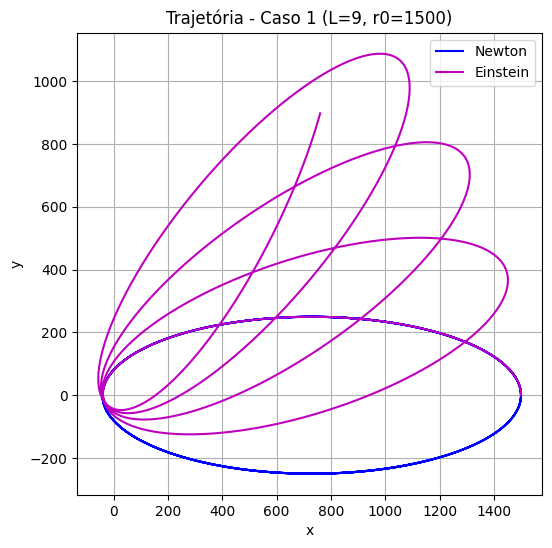

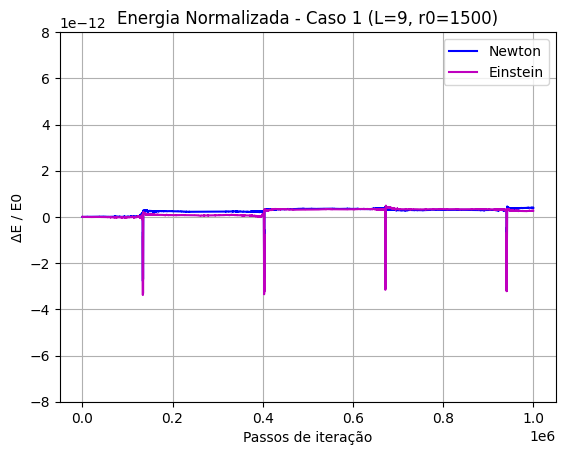

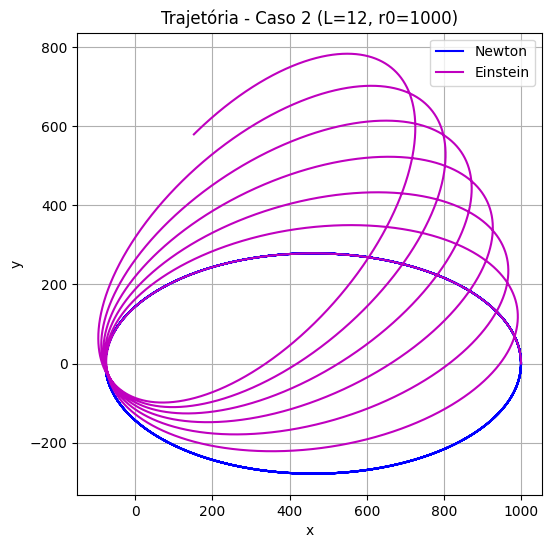

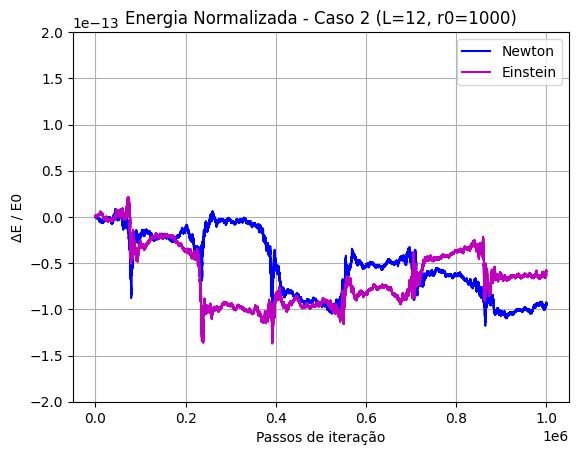

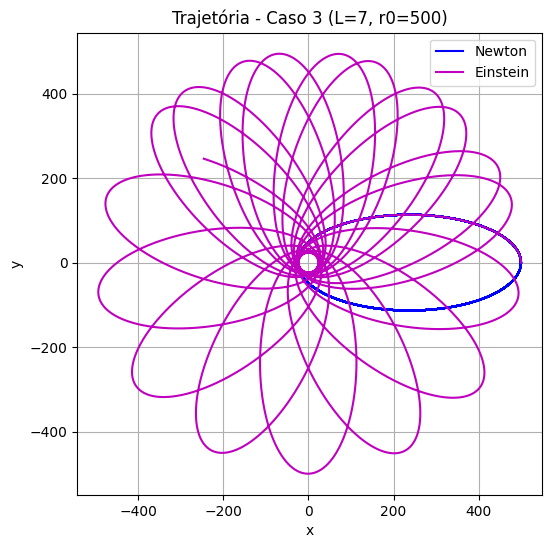

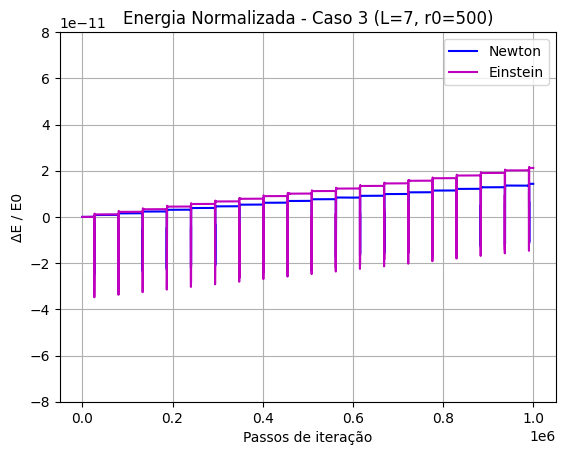

In [45]:
import matplotlib.pyplot as plt

# condições iniciais múltiplas
condicoes = [
    {'L': 9,  'r0': 1500},
    {'L': 12, 'r0': 1000},
    {'L': 7,  'r0': 500}
]

# limites do eixo y para energia (cada tupla: (ymin, ymax))
ylim_energia = [
    (-8e-12, 8e-12),
    (-2e-13, 2e-13),
    (-8e-11, 8e-11)
]

# parâmetros fixos
N = 1000000
Tmax = 500000
v0 = 0
th0 = 0
M = 1

# loop para cada conjunto de condições iniciais
for i, cond in enumerate(condicoes):
    L = cond['L']
    r0 = cond['r0']


    # NEWTON
    t_n, orbita_n = newton(N, Tmax, L, r0, v0, th0, fr, fv, fth)
    r_n = orbita_n[0, :]
    v_n = orbita_n[1, :]
    th_n = orbita_n[2, :]

    U_n = -(M / r_n)
    E_n = 0.5 * v_n**2 + (L**2) / (2 * r_n**2) + U_n

    # EINSTEIN
    t_e, orbita_e = einstein(N, Tmax, L, r0, v0, th0, fr, fv2, fth)
    r_e = orbita_e[0, :]
    v_e = orbita_e[1, :]
    th_e = orbita_e[2, :]

    U_e = -(M / r_e)
    E_e = 0.5 * v_e**2 + (L**2) / (2 * r_e**2) + U_e - ((L**2) * M) / (r_e**3)

    # coordenadas cartesianas
    x_n = r_n * np.cos(th_n)
    y_n = r_n * np.sin(th_n)

    x_e = r_e * np.cos(th_e)
    y_e = r_e * np.sin(th_e)

#graficos
    # 1. Trajetória
    plt.figure(figsize=(6,6))
    plt.plot(x_n, y_n, 'b', label="Newton")
    plt.plot(x_e, y_e, 'm', label="Einstein")
    plt.title(f"Trajetória - Caso {i+1} (L={L}, r0={r0})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # 2. Energia
    plt.figure()
    plt.plot(E_n / E_n[0] - 1, 'b', label="Newton")
    plt.plot(E_e / E_e[0] - 1, 'm', label="Einstein")
    plt.title(f"Energia Normalizada - Caso {i+1} (L={L}, r0={r0})")
    plt.xlabel("Passos de iteração")
    plt.ylabel("ΔE / E0")
    plt.ylim(ylim_energia[i])  # define limites do eixo y conforme o caso
    plt.legend()
    plt.grid(True)

plt.show()

Os gráficos representam as órbitas e a variação da energia mecânica, que vamos chamar de $E_{relativo} = 1 - \frac{E_{m}}{E_{inicial}}$.

É possível observar nas figuras a precessão relativística de Einstein, na cor magenta, em relação às trajetórias descritas pelas equações de Newton, na cor azul. As órbitas iniciais dos dois modelos são muito semelhantes, porém divergem posteriormente. Além disso, os gráficos apresentados nos mostram o $\Delta E_{relativo}$ muito próximo a zero, como por exemplo na figura 2, em que a variação de $\approx 10^{-12}$.
É importante ressaltar que a determinação da energia foi realizada com o propósito de reforçar a confiabilidade dos cálculos. Quando a energia mecânica é conservada em um estado de equilíbrio, ou seja, quando a magnitude de sua variação é próxima de zero, é um indicador substancial da validade dos resultados obtidos. Um desvio significativamente diferente de zero nos levaria a questionar a precisão do código utilizado. 

Os gráficos evidenciam as discrepâncias entre as trajetórias calculadas utilizando a mecânica newtoniana e a relatividade geral, enfatizando a influência da curvatura do espaço-tempo nas órbitas. É importante notar que essa diferença se intensifica conforme nos aproximamos de regiões de campo gravitacional forte, resultando em um aumento significativo na precessão. Porém, para regiões de campo gravitacional fraco, isto é, raios grandes e velocidades pequenas, a precessão relativística tende a se aproximar da mecânica clássica proposta por Newton.